In [1]:
import snap
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Analyzing the Wikipedia voters network [27 points]

Example Graph

In [2]:
G = snap.TNGraph.New()
nodes = [1,2,3]
edges = [(1,2),(2,1),(1,3),(1,1)]
for node in nodes:
    G.AddNode(node)
for edge in edges:
    G.AddEdge(edge[0], edge[1])

Load `wiki-Vote.txt` graph data

In [3]:
wiki_G = snap.LoadEdgeList(snap.PNGraph, "../data/wiki-Vote.txt",0,1)

1. The number of nodes in the network. (G small has 3 nodes.)

In [4]:
print('The number of nodes in G small: ',G.GetNodes())

The number of nodes in G small:  3


In [5]:
print('The number of nodes in the Wikipedia voters network: ',wiki_G.GetNodes())

The number of nodes in the Wikipedia voters network:  7115


2. The number of nodes with a self-edge (self-loop), i.e., the number of nodes a ∈ V where
(a, a) ∈ E. (G small has 1 self-edge.)

In [6]:
print(f'G_small has {G.CntSelfEdges()} self-edge.')

G_small has 1 self-edge.


In [7]:
print(f'The Wikipedia voters network has {wiki_G.CntSelfEdges()} self-edge.')

The Wikipedia voters network has 0 self-edge.


3. The number of directed edges in the network, i.e., the number of ordered pairs (a, b) ∈ E
for which a $\neq$ b. (G small has 3 directed edges.)

In [8]:
print('The number of directed edges in G small:',G.GetEdges() - G.CntSelfEdges())

The number of directed edges in G small: 3


In [9]:
print('The number of directed edges in the Wikipedia voters network:',wiki_G.GetEdges() - wiki_G.CntSelfEdges())

The number of directed edges in the Wikipedia voters network: 103689


4. The number of undirected edges in the network, i.e., the number of unique unordered pairs
(a, b), a $\neq$ b, for which (a, b) ∈ E or (b, a) ∈ E (or both). If both (a, b) and (b, a) are edges,
this counts a single undirected edge. (G small has 2 undirected edges.)

In [11]:
print('The number of undirected edges in G small:', G.CntUniqUndirEdges())

The number of undirected edges in G small: 2


In [12]:
print('The number of undirected edges in the Wikipedia voters network:', wiki_G.CntUniqUndirEdges())

The number of undirected edges in the Wikipedia voters network: 100762


5. The number of reciprocated edges in the network, i.e., the number of unique unordered
pairs of nodes (a, b), a $\neq$ b, for which (a, b) ∈ E and (b, a) ∈ E. (G small has 1 reciprocated
edge.)

In [13]:
def calc_reciprocated_edges(graph):
    """
    Calculate the number of reciprocated-edges in a graph

    Args:
    - graph: Graph class. i.e. snap.PNGraph

    Return:
    - int(len(reciprocated_edges)/2): the number of reciprocated_edges

    """
    reciprocated_edges = set()
    
    for EI in graph.Edges():
        u = EI.GetSrcNId()
        v = EI.GetDstNId()
        reciprocated_edges.add((u,v))
        
        if (u==v):
            reciprocated_edges.remove((u,v))
    
    for EI in graph.Edges():
        u = EI.GetSrcNId()
        v = EI.GetDstNId()
        if (u!=v) and (v,u) not in reciprocated_edges:
            reciprocated_edges.remove((u, v))
            
    return int(len(reciprocated_edges) / 2)

In [43]:
print('The number of reciprocated edges in G small:', G.CntUniqBiDirEdges())

The number of reciprocated edges in G small: 1


In [44]:
print('The number of reciprocated edges in the Wikipedia voters network:', wiki_G.CntUniqBiDirEdges())

The number of reciprocated edges in the Wikipedia voters network: 2927


6. The number of nodes of zero out-degree. (G small has 1 node with zero out-degree.)

In [16]:
print('The number of nodes of zero out-degree in G small:',
      np.sum([1 if NI.GetOutDeg()==0 else 0 for NI in G.Nodes()]))

The number of nodes of zero out-degree in G small: 1


In [17]:
print('The number of nodes of zero out-degree in the Wikipedia voters network:', 
       np.sum([1 if NI.GetOutDeg()==0 else 0 for NI in wiki_G.Nodes()]))

The number of nodes of zero out-degree in the Wikipedia voters network: 1005


7. The number of nodes of zero in-degree. (G small has 0 nodes with zero in-degree.)

In [18]:
print('The number of nodes of zero out-degree in G small:',
      np.sum([1 if NI.GetInDeg()==0 else 0 for NI in G.Nodes()]))

The number of nodes of zero out-degree in G small: 0


In [19]:
print('The number of nodes of zero out-degree in the Wikipedia voters network:', 
       np.sum([1 if NI.GetInDeg()==0 else 0 for NI in wiki_G.Nodes()]))

The number of nodes of zero out-degree in the Wikipedia voters network: 4734


8. The number of nodes with more than 10 outgoing edges (out-degree > 10).

In [20]:
print('The number of nodes of zero out-degree in G small:',
      np.sum([1 if NI.GetOutDeg()>10 else 0 for NI in G.Nodes()]))

The number of nodes of zero out-degree in G small: 0


In [21]:
print('The number of nodes of zero out-degree in the Wikipedia voters network:', 
       np.sum([1 if NI.GetOutDeg()>10 else 0 for NI in wiki_G.Nodes()]))

The number of nodes of zero out-degree in the Wikipedia voters network: 1612


9. The number of nodes with fewer than 10 incoming edges (in-degree < 10).

In [22]:
print('The number of nodes of zero out-degree in G small:',
      np.sum([1 if NI.GetInDeg()<10 else 0 for NI in G.Nodes()]))

The number of nodes of zero out-degree in G small: 3


In [23]:
print('The number of nodes of zero out-degree in the Wikipedia voters network:', 
       np.sum([1 if NI.GetInDeg()<10 else 0 for NI in wiki_G.Nodes()]))

The number of nodes of zero out-degree in the Wikipedia voters network: 5165


# Further Analyzing the Wikipedia voters network [33 points]

1. (18 points) Plot the distribution of out-degrees of nodes in the network on a log-log scale.
Each data point is a pair (x, y) where x is a positive integer and y is the number of nodes
in the network with out-degree equal to x. Restrict the range of x between the minimum
and maximum out-degrees. You may filter out data points with a 0 entry. For the log-log
scale, use base 10 for both x and y axes.

In [24]:
outdeg = pd.Series([NI.GetOutDeg() for NI in wiki_G.Nodes()]).value_counts().sort_index()

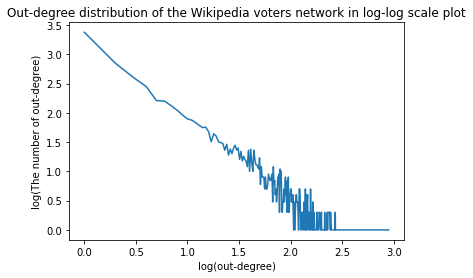

In [55]:
plt.plot(np.log10(outdeg.iloc[1:].index), np.log10(outdeg.iloc[1:]))
plt.title('Out-degree distribution of the Wikipedia voters network in log-log scale plot')
plt.xlabel('log(out-degree)')
plt.ylabel('log(The number of out-degree)')
plt.show()

2. (15 points) Compute and plot the least-square regression line for the out-degree distribution
in the log-log scale plot. Note we want to find coefficients a and b such that the function
log 10 y = a · log 10 x + b, equivalently, y = 10 b · x a , best fits the out-degree distribution.
What are the coefficients a and b? For this part, you might want to use the method called
polyfit in NumPy with deg parameter equal to 1.

In [49]:
p = np.polyfit(x=np.log10(outdeg.iloc[1:].index), y=np.log10(outdeg.iloc[1:]), deg=1)
print(f'log 10 y = {p[0]} log 10 x + {p[1]}')

log 10 y = -1.2810647056745657 log 10 x + 3.1324547044999123


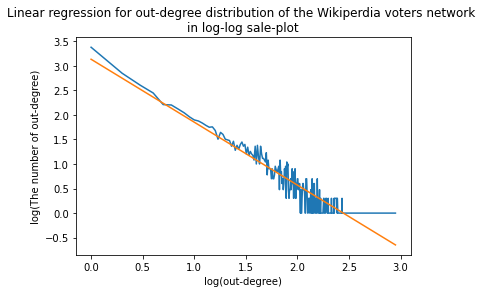

In [54]:
plt.plot(np.log10(outdeg.iloc[1:].index), np.log10(outdeg.iloc[1:]))
plt.title('Linear regression for out-degree distribution of the Wikiperdia voters network \nin log-log sale-plot')
plt.xlabel('log(out-degree)')
plt.ylabel('log(The number of out-degree)')

plt.plot(np.log10(outdeg.iloc[1:].index), p[0]*np.log10(outdeg.iloc[1:].index) + p[1])
plt.show()

# Finding Experts on the Java Programming Language on StackOverflow [40 points]

Load `stackoverflow-Java.txt` graph data

In [28]:
stack_G = snap.LoadEdgeList(snap.PNGraph, "../data/stackoverflow-Java.txt",0,1)

1. The number of weakly connected components in the network. This value can be calculated
in Snap.py via function GetWccs.

In [29]:
components = stack_G.GetWccs()

In [30]:
print('The number of weakly connected components in the StackOverflow-Java network: ',len(components))

The number of weakly connected components in the StackOverflow-Java network:  10143


2. The number of edges and the number of nodes in the largest weakly connected component.
The largest weakly connected component is calculated in Snap.py with function GetMxWcc.

In [31]:
max_component = stack_G.GetMxWcc()
print('The number of nodes in the largest weakly connected component:',max_component.GetNodes())
print('The number of edges in the largest weakly connected component:',max_component.GetEdges())

The number of nodes in the largest weakly connected component: 131188
The number of edges in the largest weakly connected component: 322486


3. IDs of the top 3 most central nodes in the network by PagePank scores. PageRank scores
are calculated in Snap.py with function GetPageRank.

In [32]:
PRankH = stack_G.GetPageRank()
PRankH.SortByDat(False)

In [33]:
print('IDs of the top 3 most central nodes in the StackOverflow-Java network')
for i in range(3):
    print(f'{PRankH.GetKey(i)}: {PRankH[PRankH.GetKey(i)]}')

IDs of the top 3 most central nodes in the StackOverflow-Java network
992484: 0.013980540412209575
135152: 0.010005538895741885
22656: 0.007103532693128619


4. IDs of the top 3 hubs and top 3 authorities in the network by HITS scores. HITS scores
are calculated in Snap.py with function GetHits.

In [34]:
NIdHubH, NIdAuthH = stack_G.GetHits()
NIdHubH.SortByDat(False)
NIdAuthH.SortByDat(False)

In [35]:
print('IDs of the top 3 hubs in the StackOverflow-Java network')
for i in range(3):
    print(f'{NIdHubH.GetKey(i)}: {NIdHubH[NIdHubH.GetKey(i)]}')

IDs of the top 3 hubs in the StackOverflow-Java network
892029: 0.07336380373389548
1194415: 0.05955074418794487
359862: 0.05687564588068672


In [36]:
print('IDs of the top 3 authorities in the StackOverflow-Java network')
for i in range(3):
    print(f'{NIdAuthH.GetKey(i)}: {NIdAuthH[NIdAuthH.GetKey(i)]}')

IDs of the top 3 authorities in the StackOverflow-Java network
22656: 0.6047239730413133
157882: 0.2986993488728824
571407: 0.2839071934144654
